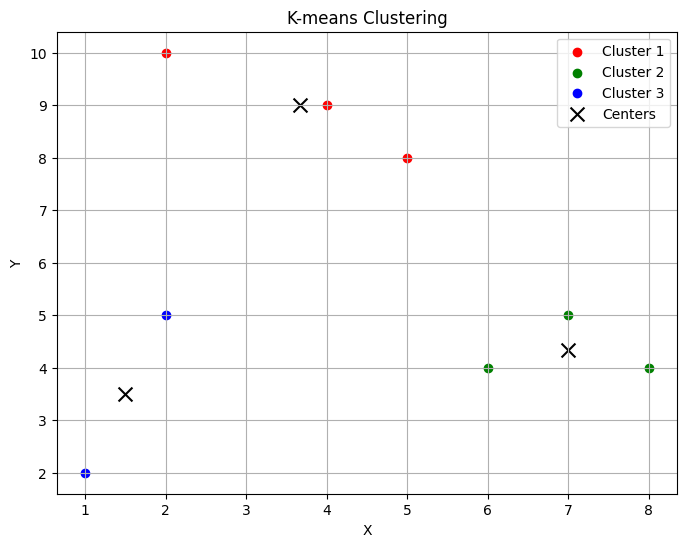

In [1]:
#without using KMeans library
import numpy as np
import matplotlib.pyplot as plt

# Data points
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
initial_centers = np.array([[2, 10], [5, 8], [1, 2]])

# Function to calculate the distance between points
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Function to assign points to the nearest cluster center
def assign_clusters(points, centers):
    clusters = []
    for point in points:
        distances = [euclidean_distance(point, center) for center in centers]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Function to update the cluster centers
def update_centers(points, clusters, k):
    new_centers = []
    for i in range(k):
        cluster_points = points[np.array(clusters) == i]
        if len(cluster_points) > 0:
            new_center = cluster_points.mean(axis=0)
        else:
            new_center = initial_centers[i]
        new_centers.append(new_center)
    return np.array(new_centers)

# Function to check if centers have converged
def has_converged(old_centers, new_centers):
    return np.array_equal(old_centers, new_centers)

# Number of clusters
k = 3

# K-means clustering algorithm
def kmeans(points, initial_centers, k):
    centers = initial_centers
    clusters = assign_clusters(points, centers)
    converged = False
    while not converged:
        new_centers = update_centers(points, clusters, k)
        converged = has_converged(centers, new_centers)
        centers = new_centers
        clusters = assign_clusters(points, centers)
    return centers, clusters

# Running K-means clustering
final_centers, final_clusters = kmeans(points, initial_centers, k)

# Plotting the results
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = points[np.array(final_clusters) == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(final_centers[:, 0], final_centers[:, 1], c='black', marker='x', s=100, label='Centers')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

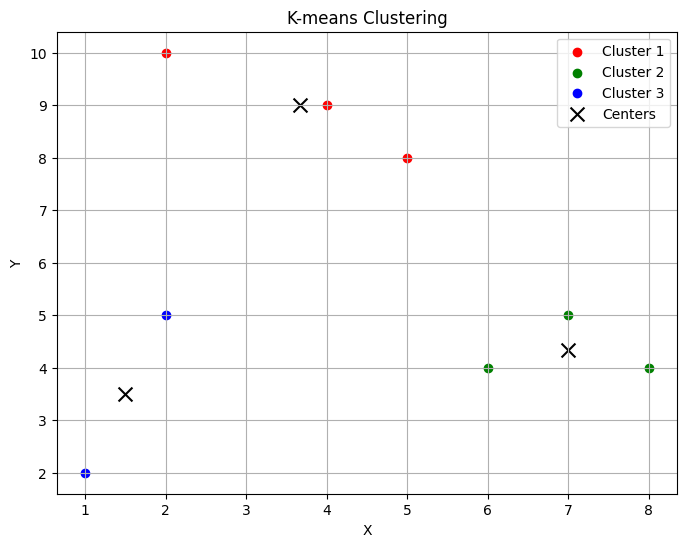

In [2]:
#using KMeans library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data points
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Initial cluster centers
initial_centers = np.array([[2, 10], [5, 8], [1, 2]])

# Number of clusters
k = 3

# KMeans clustering using sklearn
kmeans = KMeans(n_clusters=k, init=initial_centers, n_init=1)
kmeans.fit(points)

# Cluster centers and labels
final_centers = kmeans.cluster_centers_
final_clusters = kmeans.labels_

# Plotting the results
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = points[final_clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(final_centers[:, 0], final_centers[:, 1], c='black', marker='x', s=100, label='Centers')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


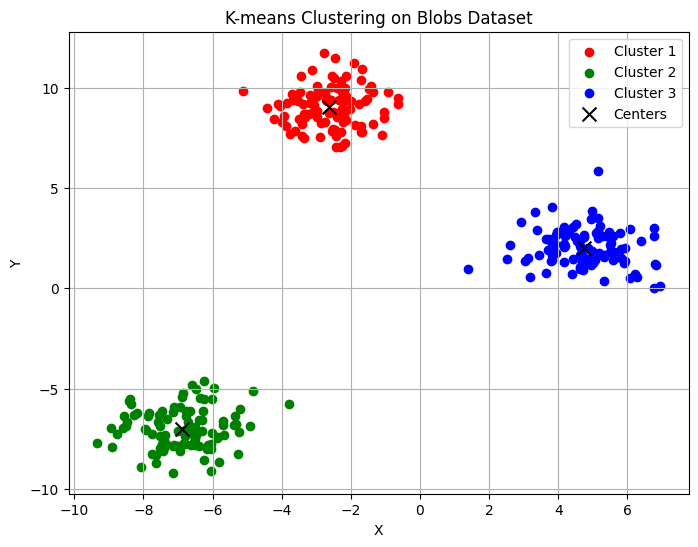

In [3]:
#KMeans clustering using make_blobs dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

points, true_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# KMeans clustering using sklearn
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(points)

# Cluster centers and labels
final_centers = kmeans.cluster_centers_
final_clusters = kmeans.labels_

# Plotting the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(n_clusters):
    cluster_points = points[final_clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(final_centers[:, 0], final_centers[:, 1], c='black', marker='x', s=100, label='Centers')
plt.title('K-means Clustering on Blobs Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
